In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")

In [4]:
df.head()
df = df.drop("Unnamed: 12", axis = 1)

In [5]:
df.head().T

,0,1,2,3,4
Age,20,24,22,22,22
Gender,Female,Female,Male,Female,Male
Marital Status,Single,Single,Single,Single,Single
Occupation,Student,Student,Student,Student,Student
Monthly Income,No Income,Below Rs.10000,Below Rs.10000,No Income,Below Rs.10000
Educational Qualifications,Post Graduate,Graduate,Post Graduate,Graduate,Post Graduate
Family size,4,3,3,6,4
latitude,12.9766,12.977,12.9551,12.9473,12.985
longitude,77.5993,77.5773,77.6593,77.5616,77.5533
Pin code,560001,560009,560017,560019,560010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [7]:
Feedback_counts = df['Feedback'].value_counts()
print(Feedback_counts)

Feedback
Positive     317
Negative      71
Name: count, dtype: int64


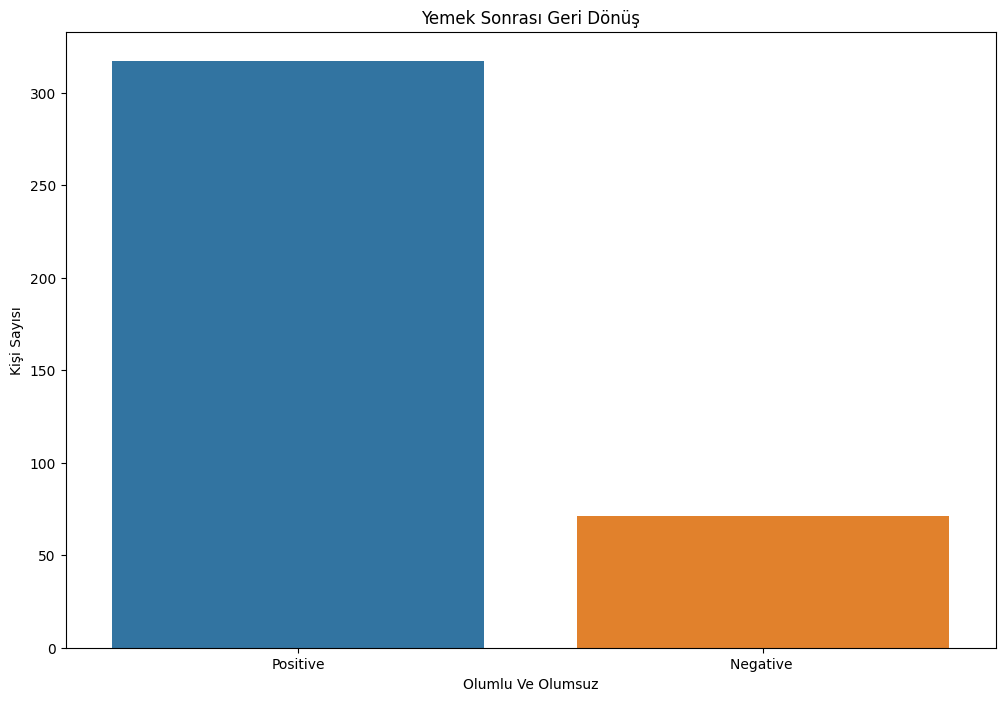

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(x=Feedback_counts.index, y=Feedback_counts.values)
plt.title('Yemek Sonrası Geri Dönüş')
plt.xlabel('Olumlu Ve Olumsuz')
plt.ylabel('Kişi Sayısı')
plt.show()

Gender
Male      222
Female    166
Name: count, dtype: int64


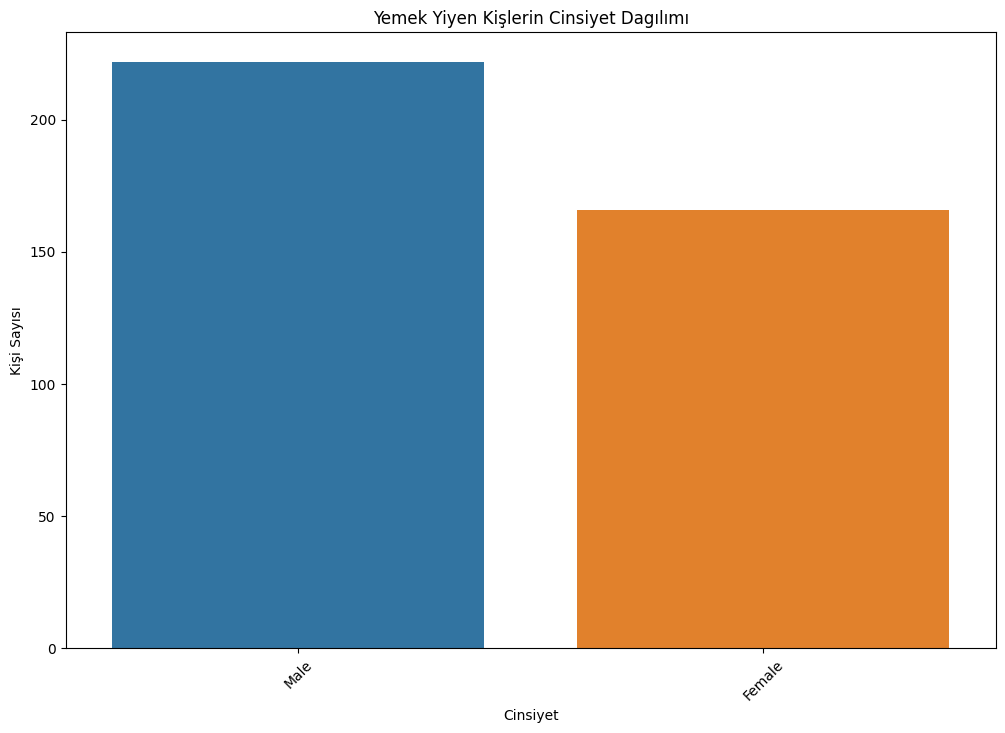

In [9]:
Gender_counts = df['Gender'].value_counts()

print(Gender_counts)

plt.figure(figsize=(12, 8))
sns.barplot(x=Gender_counts.index, y=Gender_counts.values)
plt.title('Yemek Yiyen Kişlerin Cinsiyet Dagılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=45)  # Rotate labels
plt.show()

Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64


Text(0.5, 1.0, 'Yemek Yiyen Vatandaşların Yaş Ortalaması')

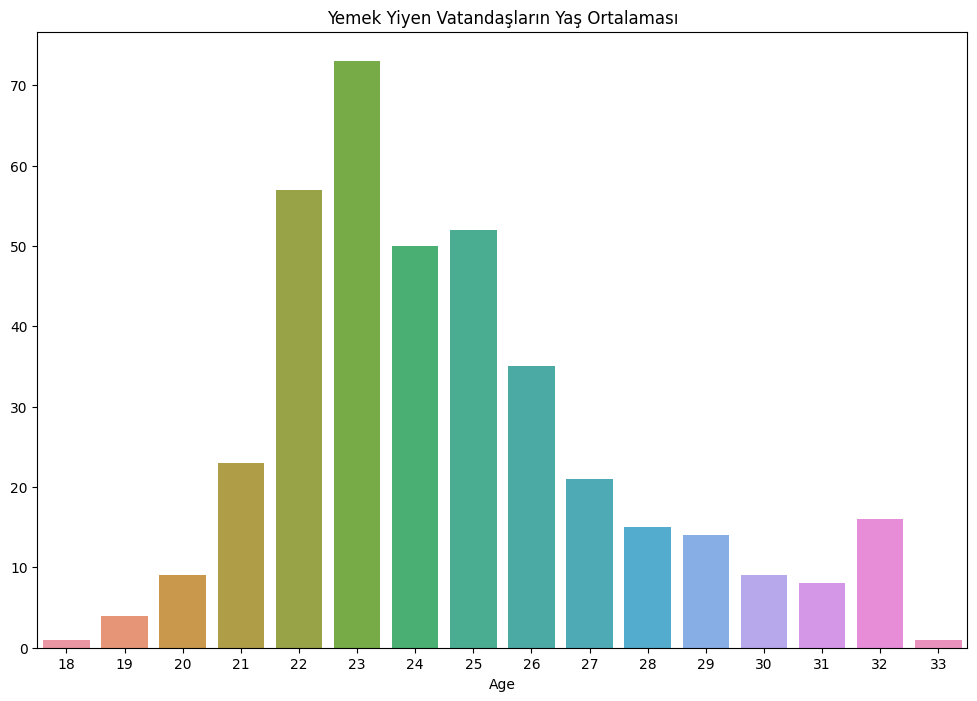

In [10]:
Age_counts = df['Age'].value_counts()

print(Age_counts)
plt.figure(figsize=(12, 8))
sns.barplot(x=Age_counts.index, y=Age_counts.values)
plt.title('Yemek Yiyen Vatandaşların Yaş Ortalaması')

In [11]:
df.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [12]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df["Output"] = LabelEncoder().fit_transform(df["Output"])
df["Feedback"] = LabelEncoder().fit_transform(df["Feedback"])
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,0,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,1,1
1,24,0,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,1,1
2,22,1,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,1,0
3,22,0,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,1,1
4,22,1,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,1,1
384,23,0,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,1,1
385,22,0,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,1,1
386,23,1,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,1,1


In [15]:
maritalstatusDummies = pd.get_dummies(df["Marital Status"], prefix = "MaritalStatus")
occupationDummies = pd.get_dummies(df["Occupation"], prefix = "Occupation")
monthlyincomeDummies = pd.get_dummies(df["Monthly Income"], prefix = "MonthlyIncome")
educationalqualificationsDummies = pd.get_dummies(df["Educational Qualifications"], prefix = "EducationalQualifications")

In [16]:
df = pd.concat([df, maritalstatusDummies], axis = 1)
df = pd.concat([df, occupationDummies], axis = 1)
df = pd.concat([df, monthlyincomeDummies], axis = 1)
df = pd.concat([df, educationalqualificationsDummies], axis = 1)
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,MonthlyIncome_10001 to 25000,MonthlyIncome_25001 to 50000,MonthlyIncome_Below Rs.10000,MonthlyIncome_More than 50000,MonthlyIncome_No Income,EducationalQualifications_Graduate,EducationalQualifications_Ph.D,EducationalQualifications_Post Graduate,EducationalQualifications_School,EducationalQualifications_Uneducated
0,20,0,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,False,False,False,False,True,False,False,True,False,False
1,24,0,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,False,False,True,False,False,True,False,False,False,False
2,22,1,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,False,False,True,False,False,False,False,True,False,False
3,22,0,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,False,False,False,False,True,True,False,False,False,False
4,22,1,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,...,False,False,False,False,True,False,False,True,False,False
384,23,0,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,...,False,False,False,False,True,False,False,True,False,False
385,22,0,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,...,False,False,False,False,True,False,False,True,False,False
386,23,1,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,...,False,False,True,False,False,False,False,True,False,False


In [17]:
df = df.drop("Marital Status", axis = 1)
df = df.drop("Occupation", axis = 1)
df = df.drop("Monthly Income", axis = 1)
df = df.drop("Educational Qualifications", axis = 1)
df

,Age,Gender,Family size,latitude,longitude,Pin code,Output,Feedback,MaritalStatus_Married,MaritalStatus_Prefer not to say,...,MonthlyIncome_10001 to 25000,MonthlyIncome_25001 to 50000,MonthlyIncome_Below Rs.10000,MonthlyIncome_More than 50000,MonthlyIncome_No Income,EducationalQualifications_Graduate,EducationalQualifications_Ph.D,EducationalQualifications_Post Graduate,EducationalQualifications_School,EducationalQualifications_Uneducated
0,20,0,4,12.9766,77.5993,560001,1,1,False,False,...,False,False,False,False,True,False,False,True,False,False
1,24,0,3,12.9770,77.5773,560009,1,1,False,False,...,False,False,True,False,False,True,False,False,False,False
2,22,1,3,12.9551,77.6593,560017,1,0,False,False,...,False,False,True,False,False,False,False,True,False,False
3,22,0,6,12.9473,77.5616,560019,1,1,False,False,...,False,False,False,False,True,True,False,False,False,False
4,22,1,4,12.9850,77.5533,560010,1,1,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,12.9766,77.5993,560001,1,1,False,False,...,False,False,False,False,True,False,False,True,False,False
384,23,0,4,12.9854,77.7081,560048,1,1,False,False,...,False,False,False,False,True,False,False,True,False,False
385,22,0,5,12.9850,77.5533,560010,1,1,False,False,...,False,False,False,False,True,False,False,True,False,False
386,23,1,2,12.9770,77.5773,560009,1,1,False,False,...,False,False,True,False,False,False,False,True,False,False


In [18]:
df.dtypes

Age                                          int64
Gender                                       int64
Family size                                  int64
latitude                                   float64
longitude                                  float64
Pin code                                     int64
Output                                       int64
Feedback                                     int64
MaritalStatus_Married                         bool
MaritalStatus_Prefer not to say               bool
MaritalStatus_Single                          bool
Occupation_Employee                           bool
Occupation_House wife                         bool
Occupation_Self Employeed                     bool
Occupation_Student                            bool
MonthlyIncome_10001 to 25000                  bool
MonthlyIncome_25001 to 50000                  bool
MonthlyIncome_Below Rs.10000                  bool
MonthlyIncome_More than 50000                 bool
MonthlyIncome_No Income        

In [19]:
X = df.drop("Feedback", axis = 1)
y = df["Feedback"]

In [20]:
X

,Age,Gender,Family size,latitude,longitude,Pin code,Output,MaritalStatus_Married,MaritalStatus_Prefer not to say,MaritalStatus_Single,...,MonthlyIncome_10001 to 25000,MonthlyIncome_25001 to 50000,MonthlyIncome_Below Rs.10000,MonthlyIncome_More than 50000,MonthlyIncome_No Income,EducationalQualifications_Graduate,EducationalQualifications_Ph.D,EducationalQualifications_Post Graduate,EducationalQualifications_School,EducationalQualifications_Uneducated
0,20,0,4,12.9766,77.5993,560001,1,False,False,True,...,False,False,False,False,True,False,False,True,False,False
1,24,0,3,12.9770,77.5773,560009,1,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,22,1,3,12.9551,77.6593,560017,1,False,False,True,...,False,False,True,False,False,False,False,True,False,False
3,22,0,6,12.9473,77.5616,560019,1,False,False,True,...,False,False,False,False,True,True,False,False,False,False
4,22,1,4,12.9850,77.5533,560010,1,False,False,True,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,0,2,12.9766,77.5993,560001,1,False,False,True,...,False,False,False,False,True,False,False,True,False,False
384,23,0,4,12.9854,77.7081,560048,1,False,False,True,...,False,False,False,False,True,False,False,True,False,False
385,22,0,5,12.9850,77.5533,560010,1,False,False,True,...,False,False,False,False,True,False,False,True,False,False
386,23,1,2,12.9770,77.5773,560009,1,False,False,True,...,False,False,True,False,False,False,False,True,False,False


In [21]:
y

0      1
1      1
2      0
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Feedback, Length: 388, dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit_transform(X)
X_scaled = pd.DataFrame(scaler, columns = X.columns)
X_scaled

,Age,Gender,Family size,latitude,longitude,Pin code,Output,MaritalStatus_Married,MaritalStatus_Prefer not to say,MaritalStatus_Single,...,MonthlyIncome_10001 to 25000,MonthlyIncome_25001 to 50000,MonthlyIncome_Below Rs.10000,MonthlyIncome_More than 50000,MonthlyIncome_No Income,EducationalQualifications_Graduate,EducationalQualifications_Ph.D,EducationalQualifications_Post Graduate,EducationalQualifications_School,EducationalQualifications_Uneducated
0,0.133333,0.0,0.6,0.470439,0.420073,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.400000,0.0,0.4,0.472128,0.339781,0.074074,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.266667,1.0,0.4,0.379645,0.639051,0.148148,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.266667,0.0,1.0,0.346706,0.282482,0.166667,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.266667,1.0,0.6,0.505912,0.252190,0.083333,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.333333,0.0,0.2,0.470439,0.420073,0.000000,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
384,0.333333,0.0,0.6,0.507601,0.817153,0.435185,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
385,0.266667,0.0,0.8,0.505912,0.252190,0.083333,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
386,0.333333,1.0,0.2,0.472128,0.339781,0.074074,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

NameError: name 'train_test_split' is not defined

In [ ]:
X_train.shape, y_train.shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
modelo = tf.keras.Sequential()
modelo.add(tf.keras.layers.Dense(8, input_shape = (X_train.shape[1], ), activation = "relu"))
modelo.add(tf.keras.layers.Dense(4, activation = "relu"))
modelo.add(tf.keras.layers.Dense(1, activation = "sigmoid"))
modelo.summary()

In [ ]:
modelo.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10)
modelo.fit(X_train, y_train, validation_split = 0.2, batch_size = 100, epochs = 500, callbacks = [early_stop])

In [ ]:
df_historia = pd.DataFrame(modelo.history.history)
df_historia

In [ ]:
y_pred = modelo.predict(X_test)

y_pred = np.round(y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
print("Modelin Dogruluk Oranı: ", accuracy_score(y_test, y_pred) * 100)

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)